#Drink Dataset 

Data Resource : https://github.com/fivethirtyeight/data/blob/master/alcohol-consumption/drinks.csv

Story Behind : https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [3]:
df= pd.read_csv('drinks.csv')

In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

#Exploratory Data Analysis

In [6]:
df[['wine_servings','continent']].groupby('continent').sum()

,wine_servings
continent,
Africa,862
Asia,399
Europe,6400
North America,564
Oceania,570
South America,749


In [7]:
df[["beer_servings","continent"]].groupby(["continent"]).describe()

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

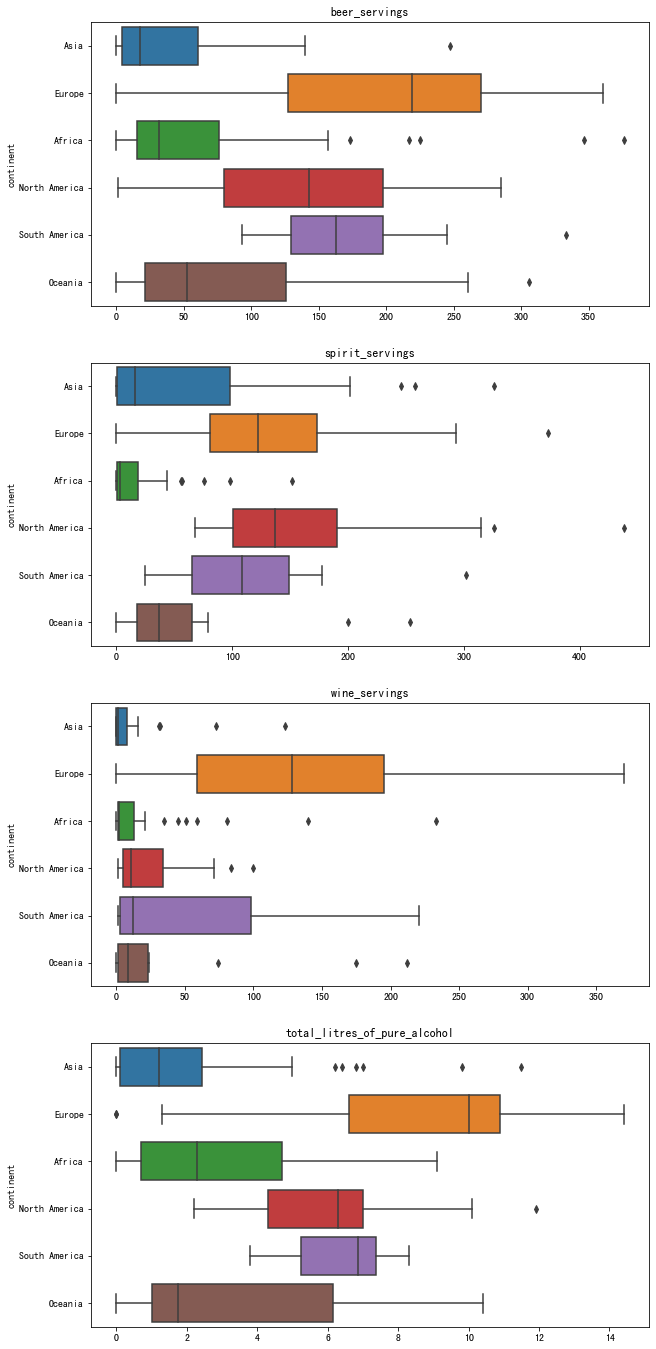

In [8]:
fig,  ax = plt.subplots(nrows=4, ncols=1, figsize=(10,24))

column = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
category = [df[i].value_counts() for i in column]
r = 0
for j in range(4):
    
    axes = ax[j]

    sns.boxplot(x=column[r],y="continent",data=df,ax=axes)
    axes.set_xlabel('')
    axes.set_title(column[r])
    r+=1

plt.show()


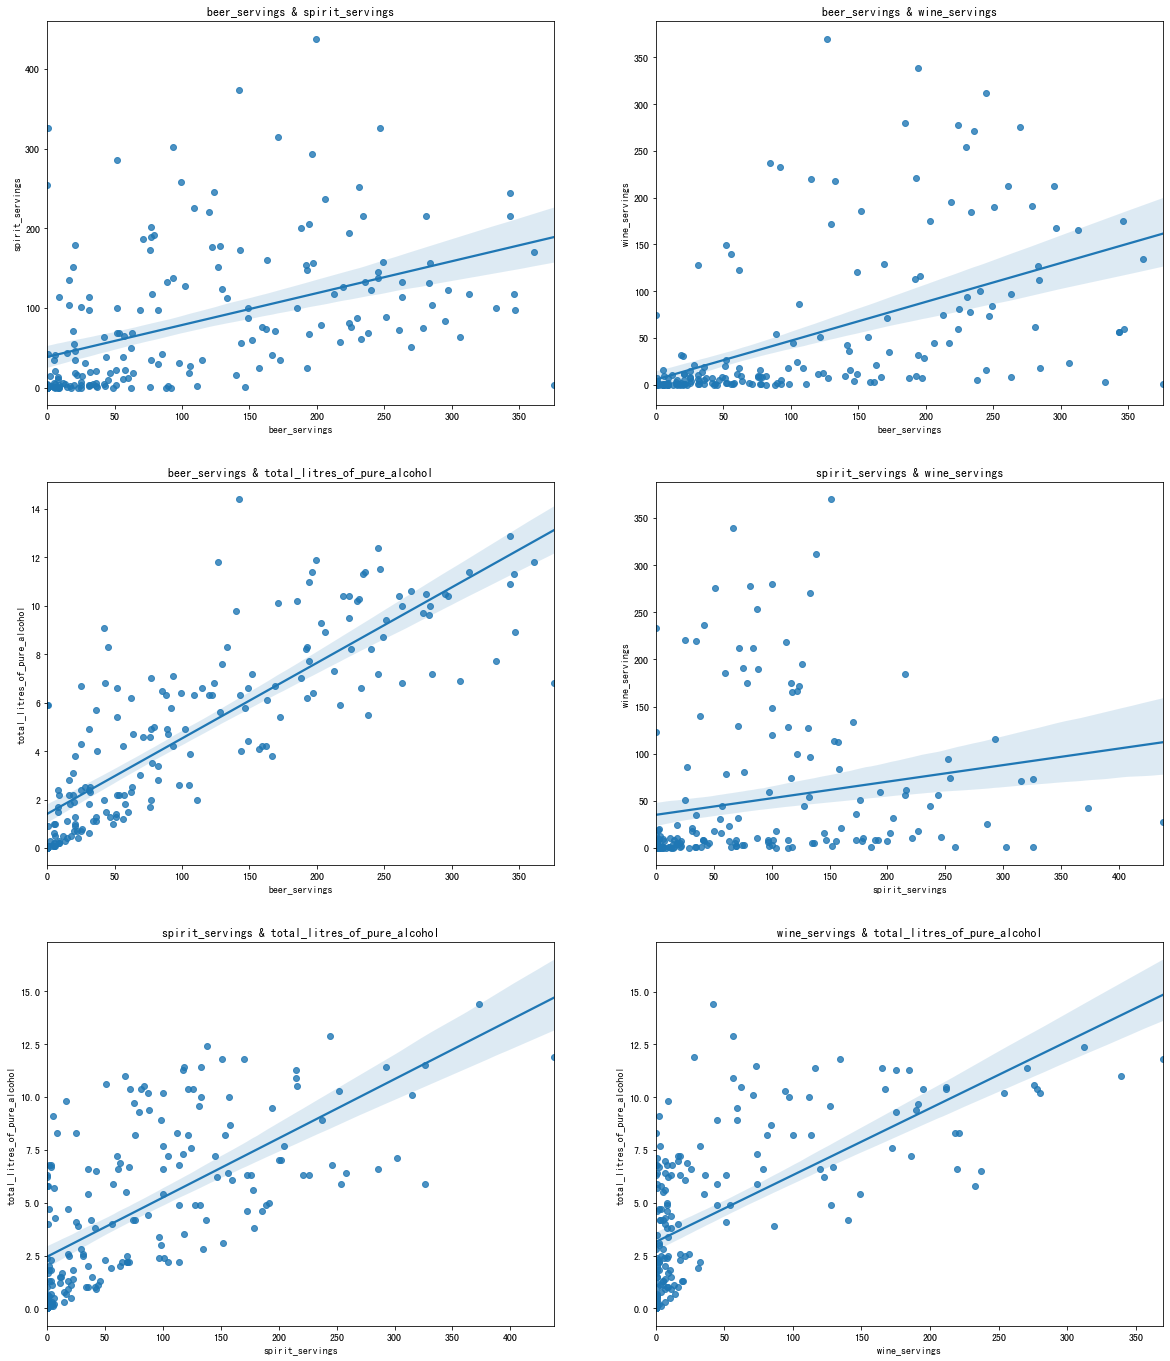

In [9]:
fig,  ax = plt.subplots(nrows=3, ncols=2, figsize=(20,24))
column = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
category = [df[i].value_counts() for i in column]
axe = [ax[i][j] for i in range(3) for j in range(2)]
r = 0

for i in range(3):
    for j in range(i+1,4):
        axes = axe[r]
        sns.regplot(x=column[i],y=column[j],data=df,ax=axes)
        axes.set_title(f'{column[i]} & {column[j]}')
        r+=1
        
plt.show()

#Modeling


In [10]:
print('LinearRegression - Wine and Total')
print()
lm = LinearRegression()
x=df[['wine_servings']]
y=df[['total_litres_of_pure_alcohol']]
lm.fit(x,y)
lm.score(x,y)
print(f'Total = ({str(lm.coef_[0][0])[:6]} * Wine) + {str(lm.intercept_[0])[:6]}')
print('R^2 = ',lm.score(x,y))


LinearRegression - Wine and Total

Total = (0.0316 * Wine) + 3.1540
R^2 =  0.4456875459787605


In [11]:
print('LinearRegression - Beer and Total')
print()
lm = LinearRegression()
x=df[['beer_servings']]
y=df[['total_litres_of_pure_alcohol']]
lm.fit(x,y)
lm.score(x,y)
print(f'Total = ({str(lm.coef_[0][0])[:6]} * Beer) + {str(lm.intercept_[0])[:6]}')
print('R^2 = ',lm.score(x,y))


LinearRegression - Beer and Total

Total = (0.0311 * Beer) + 1.4067
R^2 =  0.6986262119487155


In [12]:
print('LinearRegression - Spirit and Total')
print()
lm = LinearRegression()
x=df[['spirit_servings']]
y=df[['total_litres_of_pure_alcohol']]
lm.fit(x,y)
lm.score(x,y)
print(f'Total = ({str(lm.coef_[0][0])[:6]} * Spirit) + {str(lm.intercept_[0])[:6]}')
print('R^2 = ',lm.score(x,y))


LinearRegression - Spirit and Total

Total = (0.0279 * Spirit) + 2.4497
R^2 =  0.4289833103726812


LinearRegression - Wine + Beer + Spirit and Total

Total = (0.0165 * Wine) + (0.0181 * Beer) + (0.0169 * Spirit) + 0.4779
R^2 =  0.7549608066333018


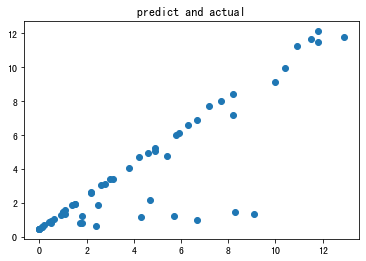

In [13]:
print('LinearRegression - Wine + Beer + Spirit and Total')
print()
Z=df[['wine_servings',"beer_servings", "spirit_servings" ]]
y=df[['total_litres_of_pure_alcohol']]

Z_train , Z_test , y_train, y_test = train_test_split(Z , y , test_size=0.3, random_state=0) 
lm1 = LinearRegression()
lm1.fit(Z_train , y_train)
print(f'Total = ({str(lm1.coef_[0][0])[:6]} * Wine) + ({str(lm1.coef_[0][1])[:6]} * Beer) + ({str(lm1.coef_[0][2])[:6]} * Spirit) + {str(lm1.intercept_[0])[:6]}')

print("R^2 = ",lm1.score(Z_test , y_test))

lm1.predict(Z_test)
plt.scatter(y_test,lm1.predict(Z_test))
plt.title('predict and actual')
plt.show()




PipeLine - Standard , Polynomial(degree=3) , LinearRegression

R^2 =  0.7746820927843575


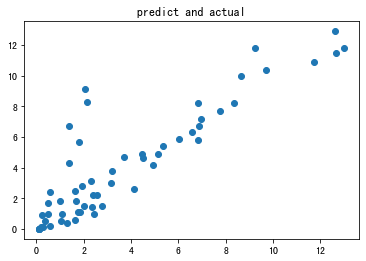

In [14]:
print('PipeLine - Standard , Polynomial(degree=3) , LinearRegression')
print()
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=3, include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(Z_train,y_train)
print("R^2 = ",pipe.score(Z_test,y_test))
plt.scatter(pipe.predict(Z_test),y_test)
plt.title('predict and actual')
plt.show()



RidgeModel - alpha(0.1)

R^2 =  0.7549608184502712
Total = (0.0165 * Wine) + (0.0181 * Beer) + (0.0169 * Spirit) + 0.4779


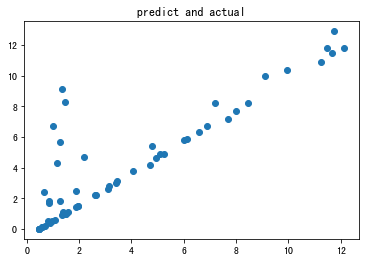

In [15]:
print('RidgeModel - alpha(0.1)')
print()
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(Z_train,y_train)
print("R^2 = ",RidgeModel.score(Z_test,y_test))
print(f'Total = ({str(RidgeModel.coef_[0][0])[:6]} * Wine) + ({str(RidgeModel.coef_[0][1])[:6]} * Beer) + ({str(RidgeModel.coef_[0][2])[:6]} * Spirit) + {str(RidgeModel.intercept_[0])[:6]}')
plt.scatter(RidgeModel.predict(Z_test),y_test)
plt.title('predict and actual')
plt.show()


#Ridge(alpha=Ｘ) alpha越大懲罰越大 


Polynomial(degree=3) + RidgeModel - alpha(0.1) 

R^2 =  0.7746824248087052


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.84e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


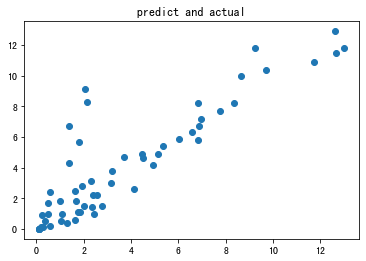

In [16]:
print('Polynomial(degree=3) + RidgeModel - alpha(0.1) ')
print()
pr=PolynomialFeatures(degree=3)
Z_train_pr=pr.fit_transform(Z_train)
Z_test_pr=pr.fit_transform(Z_test)

RidgeModel=Ridge(alpha=0.2)
RidgeModel.fit(Z_train_pr,y_train)
print("R^2 = ",RidgeModel.score(Z_test_pr,y_test))

plt.scatter(RidgeModel.predict(Z_test_pr),y_test)
plt.title('predict and actual')
plt.show()